In [26]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 3*32*32
from torch.autograd import  Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        # self.bn1 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # self.drop1 = nn.Dropout2d()
        self.fc2 = nn.Linear(120, 84)
        # self.drop2 = nn.Dropout2d()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        # x = self.bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        # x = self.bn2(x)
        # fully connect
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        # x = self.drop1(x)
        x = F.relu(self.fc2(x))
        # x = self.drop2(x)
        x = self.fc3(x)
        return x

# our model
net = Net()

# Define loss (Cross-Entropy)
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# SGD with momentum
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
loss_set = []
accuracy_CNN = []
if __name__ ==  '__main__':
    # Train the network
    for epoch in range(20):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # warp them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            outputs = net(inputs)
            # loss
            loss = criterion(outputs, labels)
            # backward
            loss = loss.requires_grad_()
            loss.backward()
            # update weights
            optimizer.step()

            # print statistics
            loss_set.append(loss.item())
            running_loss += loss.item()
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
                
        # print("Beginning Testing")
        correct = 0
        total = 0
        for data in testloader:
          images, labels = data
          outputs = net(Variable(images))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum()
        accuracy_CNN.append((correct // total).item())

        print('Accuracy of the network on the 10000 test images: %d %%' % (
                100 * correct // total))

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.194
[1,  4000] loss: 1.884
[1,  6000] loss: 1.673
[1,  8000] loss: 1.596
[1, 10000] loss: 1.546
[1, 12000] loss: 1.467
Accuracy of the network on the 10000 test images: 48 %
[2,  2000] loss: 1.399
[2,  4000] loss: 1.351
[2,  6000] loss: 1.353
[2,  8000] loss: 1.319
[2, 10000] loss: 1.327
[2, 12000] loss: 1.320
Accuracy of the network on the 10000 test images: 53 %
[3,  2000] loss: 1.215
[3,  4000] loss: 1.225
[3,  6000] loss: 1.200
[3,  8000] loss: 1.212
[3, 10000] loss: 1.211
[3, 12000] loss: 1.178
Accuracy of the network on the 10000 test images: 58 %
[4,  2000] loss: 1.114
[4,  4000] loss: 1.111
[4,  6000] loss: 1.112
[4,  8000] loss: 1.134
[4, 10000] loss: 1.122
[4, 12000] loss: 1.121
Accuracy of the network on the 10000 test images: 60 %
[5,  2000] loss: 1.035
[5,  4000] loss: 1.049
[5,  6000] loss: 1.050
[5,  8000] loss: 1.046
[5, 10000] loss: 1.060
[5, 12000] loss: 1.057
Accuracy of th

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 3*32*32
from torch.autograd import  Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        # fully connect
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# our model
net = Net()

# Define loss (Cross-Entropy)
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# SGD with momentum
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
loss_set = []
accuracy_MLP = []
if __name__ ==  '__main__':
    # Train the network
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # warp them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            outputs = net(inputs)
            # loss
            # print(outputs)
            # print(labels)
            loss = criterion(outputs, labels)
            # backward
            loss.backward()
            # update weights
            optimizer.step()

            # print statistics
            loss_set.append(loss.item())
            running_loss += loss.item()
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
            
            
        print("Beginning Testing")
        correct = 0
        total = 0
        for data in testloader:
          images, labels = data
          outputs = net(Variable(images))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum()

        print('Accuracy of the network on the 10000 test images: %d %%' % (
                100 * correct // total))
        accuracy_MLP.append((correct // total).item())

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 1.902
[1,  4000] loss: 1.704
[1,  6000] loss: 1.629
[1,  8000] loss: 1.584
[1, 10000] loss: 1.550
[1, 12000] loss: 1.535
Beginning Testing
Accuracy of the network on the 10000 test images: 46 %
[2,  2000] loss: 1.445
[2,  4000] loss: 1.440
[2,  6000] loss: 1.405
[2,  8000] loss: 1.409
[2, 10000] loss: 1.383
[2, 12000] loss: 1.376
Beginning Testing
Accuracy of the network on the 10000 test images: 51 %
[3,  2000] loss: 1.280
[3,  4000] loss: 1.283
[3,  6000] loss: 1.319
[3,  8000] loss: 1.299
[3, 10000] loss: 1.283
[3, 12000] loss: 1.306
Beginning Testing
Accuracy of the network on the 10000 test images: 51 %
[4,  2000] loss: 1.159
[4,  4000] loss: 1.190
[4,  6000] loss: 1.207
[4,  8000] loss: 1.216
[4, 10000] loss: 1.206
[4, 12000] loss: 1.202
Beginning Testing
Accuracy of the network on the 10000 test images: 53 %
[5,  2000] loss: 1.071
[5,  4000] loss: 1.107
[5,  6000] loss: 1.114
[5,  8000] 

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 3*32*32
from torch.autograd import  Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 10)

    def forward(self, x):
        # fully connect
        x = x.view(-1, 32*32*3)
        x = F.softmax(self.fc1(x))
        return x

# our model
net = Net()

# Define loss (Cross-Entropy)
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# SGD with momentum
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
loss_set = []
accuracy_SR = []
if __name__ ==  '__main__':
    # Train the network
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # warp them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            outputs = net(inputs)
            # loss
            # print(outputs)
            # print(labels)
            loss = criterion(outputs, labels)
            # backward
            loss.backward()
            # update weights
            optimizer.step()

            # print statistics
            loss_set.append(loss.item())
            running_loss += loss.item()
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
                
        print("Beginning Testing")
        correct = 0
        total = 0
        for data in testloader:
            images, labels = data
            outputs = net(Variable(images))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()

        print('Accuracy of the network on the 10000 test images: %d %%' % (
                100 * correct // total))
        accuracy_SR.append((correct // total).item())

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1,  2000] loss: 2.165
[1,  4000] loss: 2.110
[1,  6000] loss: 2.101
[1,  8000] loss: 2.079
[1, 10000] loss: 2.078
[1, 12000] loss: 2.073
Beginning Testing
Accuracy of the network on the 10000 test images: 39 %
[2,  2000] loss: 2.065
[2,  4000] loss: 2.064
[2,  6000] loss: 2.052
[2,  8000] loss: 2.051
[2, 10000] loss: 2.053
[2, 12000] loss: 2.056
Beginning Testing
Accuracy of the network on the 10000 test images: 40 %
[3,  2000] loss: 2.048
[3,  4000] loss: 2.043
[3,  6000] loss: 2.037
[3,  8000] loss: 2.050
[3, 10000] loss: 2.045
[3, 12000] loss: 2.046
Beginning Testing
Accuracy of the network on the 10000 test images: 41 %
[4,  2000] loss: 2.029
[4,  4000] loss: 2.036
[4,  6000] loss: 2.042
[4,  8000] loss: 2.036
[4, 10000] loss: 2.048
[4, 12000] loss: 2.031
Beginning Testing
Accuracy of the network on the 10000 test images: 40 %
[5,  2000] loss: 2.021
[5,  4000] loss: 2.036
[5,  6000] loss: 2.037
[5,  8000] loss: 2.033
[5, 10000] loss: 2.029
[5, 12000] loss: 2.029
Beginning Testing


In [27]:
accuracy_CNN = [0.49, 0.55, 0.55, 0.59, 0.59, 0.61, 0.60, 0.62, 0.62, 0.63]
accuracy_MLP = [0.46, 0.51, 0.51, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.54]
accuracy_SR = [0.39, 0.40, 0.41, 0.40, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41]

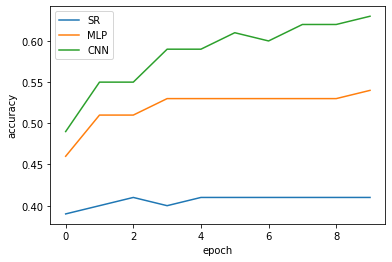

In [28]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, 9, 10)
plt.plot(x, accuracy_SR, label="SR")
plt.legend()
plt.plot(x, accuracy_MLP, label="MLP")
plt.legend()
plt.plot(x, accuracy_CNN, label="CNN")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [24]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 3*32*32
from torch.autograd import  Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.bn1 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.drop1 = nn.Dropout2d()
        self.fc2 = nn.Linear(120, 84)
        self.drop2 = nn.Dropout2d()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.bn2(x)
        # fully connect
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        x = self.drop2(x)
        x = self.fc3(x)
        return x

# our model
net = Net()

# Define loss (Cross-Entropy)
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# SGD with momentum
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
loss_set = []
accuracy_CNNnor = []
if __name__ ==  '__main__':
    # Train the network
    for epoch in range(20):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # warp them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            outputs = net(inputs)
            # loss
            loss = criterion(outputs, labels)
            # backward
            loss = loss.requires_grad_()
            loss.backward()
            # update weights
            optimizer.step()

            # print statistics
            loss_set.append(loss.item())
            running_loss += loss.item()
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
                
        # print("Beginning Testing")
        correct = 0
        total = 0
        for data in testloader:
          images, labels = data
          outputs = net(Variable(images))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum()
        accuracy_CNNnor.append((correct // total))

        print('Accuracy of the network on the 10000 test images: %d %%' % (
                100 * correct // total))

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.093
[1,  4000] loss: 1.857
[1,  6000] loss: 1.794
[1,  8000] loss: 1.734
[1, 10000] loss: 1.694
[1, 12000] loss: 1.675
Accuracy of the network on the 10000 test images: 39 %
[2,  2000] loss: 1.635
[2,  4000] loss: 1.614
[2,  6000] loss: 1.595
[2,  8000] loss: 1.577
[2, 10000] loss: 1.557
[2, 12000] loss: 1.573
Accuracy of the network on the 10000 test images: 45 %
[3,  2000] loss: 1.514
[3,  4000] loss: 1.527
[3,  6000] loss: 1.503
[3,  8000] loss: 1.485
[3, 10000] loss: 1.508
[3, 12000] loss: 1.493
Accuracy of the network on the 10000 test images: 47 %
[4,  2000] loss: 1.465
[4,  4000] loss: 1.454
[4,  6000] loss: 1.440
[4,  8000] loss: 1.429
[4, 10000] loss: 1.454
[4, 12000] loss: 1.418
Accuracy of the network on the 10000 test images: 49 %
[5,  2000] loss: 1.382
[5,  4000] loss: 1.397
[5,  6000] loss: 1.401
[5,  8000] loss: 1.389
[5, 10000] loss: 1.390
[5, 12000] loss: 1.396
Accuracy of th

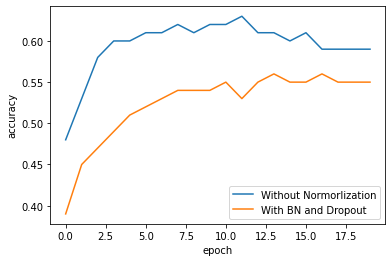

In [30]:
without = [0.48, 0.53, 0.58, 0.60, 0.60, 0.61, 0.61, 0.62, 0.61, 0.62,0.62, 0.63, 0.61, 0.61, 0.60, 0.61, 0.59, 0.59, 0.59, 0.59]
withNor = [0.39, 0.45, 0.47, 0.49, 0.51, 0.52, 0.53, 0.54, 0.54, 0.54, 0.55, 0.53, 0.55, 0.56, 0.55, 0.55, 0.56, 0.55, 0.55, 0.55]
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, 19, 20)
plt.plot(x, without, label="Without Normorlization")
plt.legend()
plt.plot(x, withNor, label="With BN and Dropout")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()